In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2, RFE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [21]:
# Load Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
display(X)
y = data.target
# print(y)
description = data.DESCR
#print(description)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


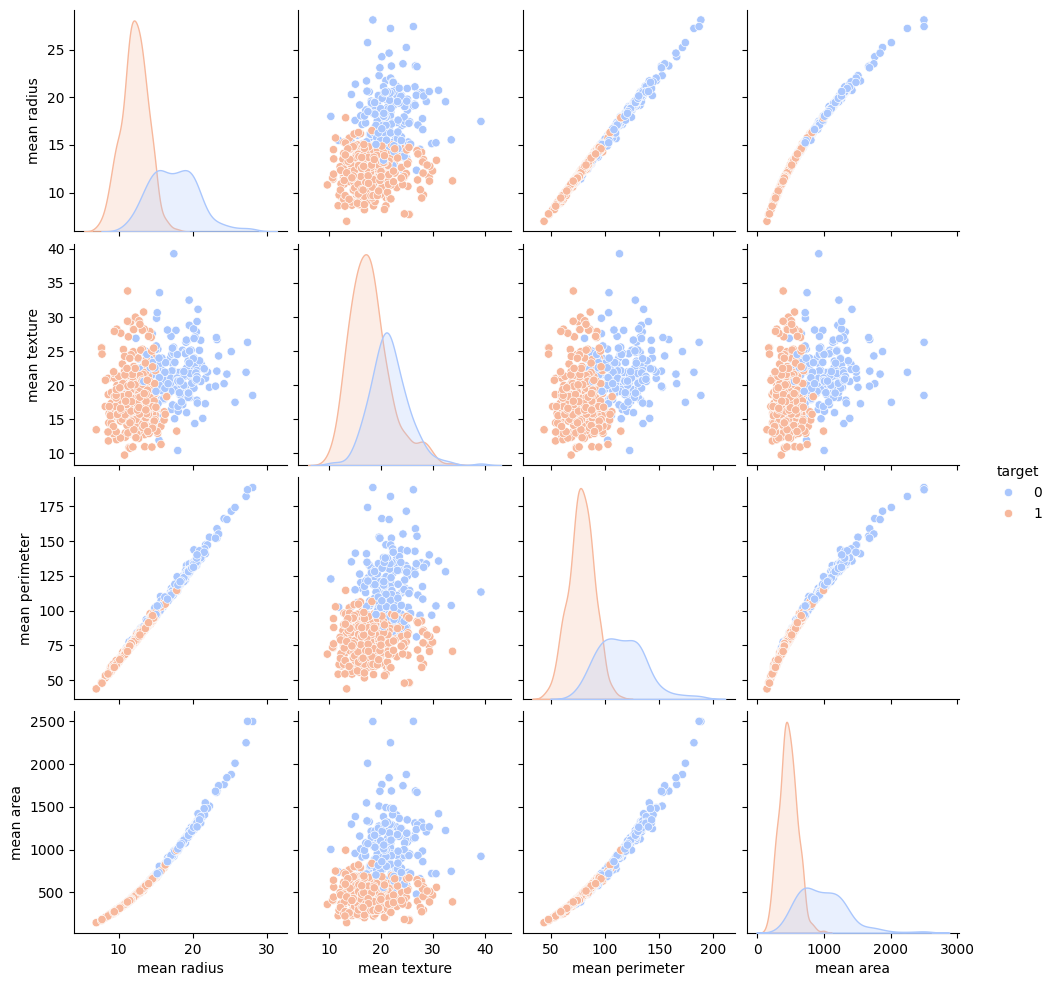

In [22]:
# Visualization
# Add target to dataframe for visualization
df = X.copy()
df['target'] = y

subset_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
df_subset = df[subset_features + ['target']]
# --------------  write a code for pairplot for a subset of features
sns.pairplot(df_subset, vars=subset_features, hue='target', palette='coolwarm')
plt.show()


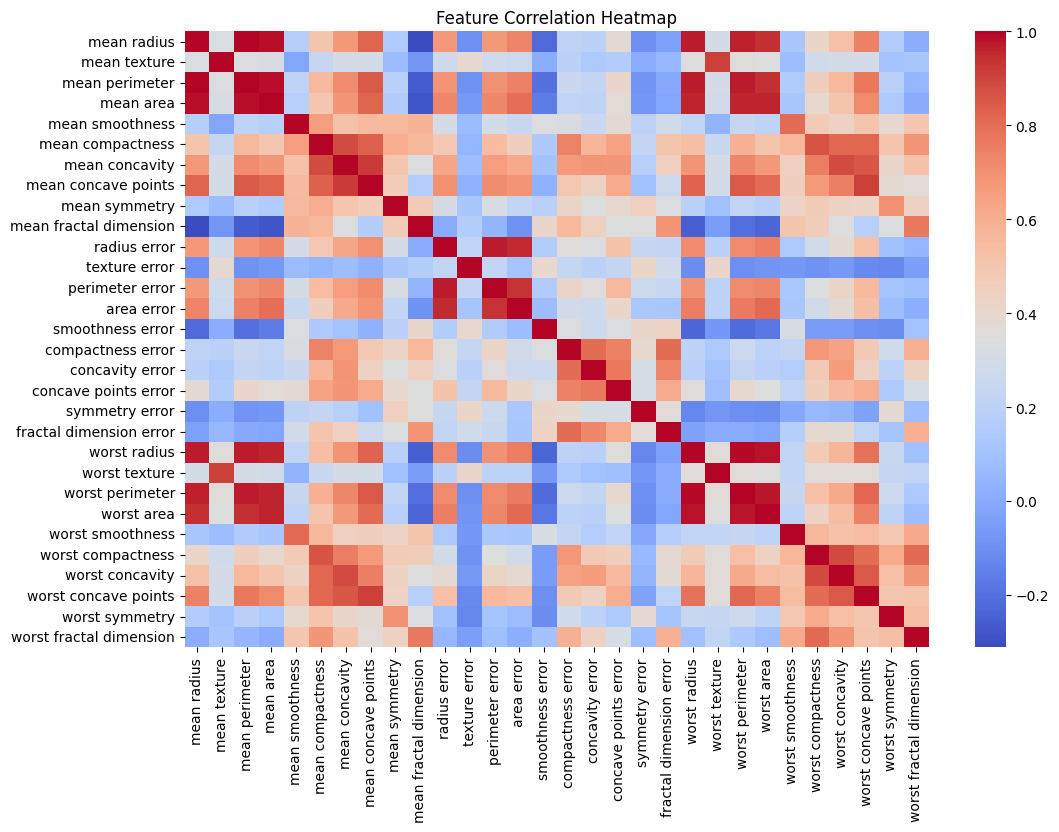

In [23]:
# -------------------------- wrie a code for correlation heatmap

correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()



<ipython-input-24-e263b06cf386>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='mean radius' , data=df, palette="coolwarm")


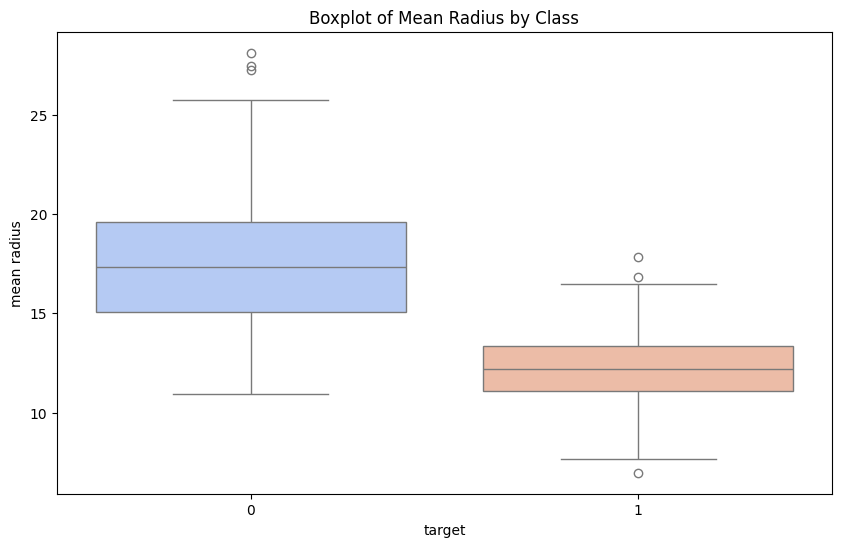

In [24]:

# --------------------- write a code to show the Boxplot of "mean radious" features
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='mean radius' , data=df, palette="coolwarm")
plt.title("Boxplot of Mean Radius by Class")
plt.show()

KNN Accuracy: 0.956140350877193


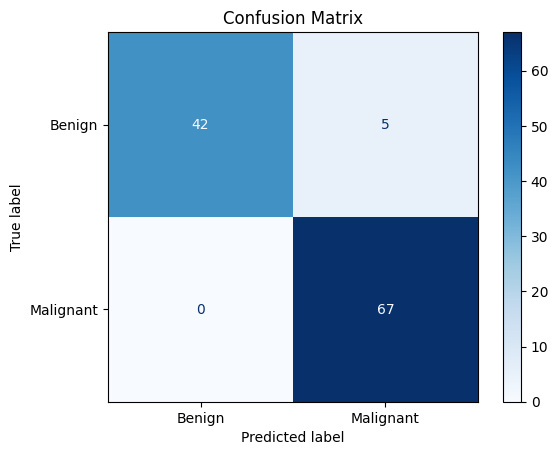

In [25]:
# -----------------  Split into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate KNN performance
def evaluate_knn(X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return acc, cm

accuracy, conf_matrix = evaluate_knn(X_train_scaled, X_test_scaled, y_train, y_test)

print("KNN Accuracy:", accuracy)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malignant"])  # Adjust labels based on dataset
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


                 Feature  MI Score
22       worst perimeter  0.459889
23            worst area  0.449064
7    mean concave points  0.447127
27  worst concave points  0.434878
20          worst radius  0.429750
2         mean perimeter  0.409936
6         mean concavity  0.371516
3              mean area  0.357969
13            area error  0.340197
0            mean radius  0.335372


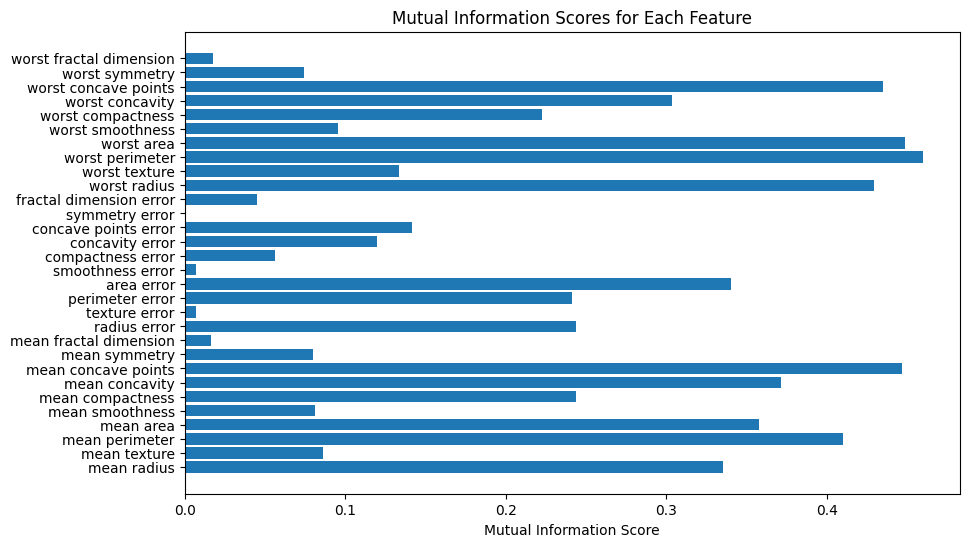

In [26]:
# ========================= Feature Selection Methods =========================

# 1. Mutual Information
mi_scores = mutual_info_classif(X_train_scaled, y_train)
mi_selected_features = np.argsort(mi_scores)[-10:]
X_train_mi = X_train_scaled[:, mi_selected_features]
X_test_mi = X_test_scaled[:, mi_selected_features]

feature_names = X.columns
mi_scores_df = pd.DataFrame({'Feature': feature_names,'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)
top_features = mi_scores_df.head(10)
print(top_features)
# print("Top 10 Feature Names:")
# print(top_features['Feature'].values)


import matplotlib.pyplot as plt

# Plot Mutual Information Scores
plt.figure(figsize=(10, 6))
plt.barh(X.columns, mi_scores)
plt.xlabel('Mutual Information Score')
plt.title('Mutual Information Scores for Each Feature')
plt.show()


                 Feature  RFE Score
7    mean concave points          1
15     compactness error          1
13            area error          1
10          radius error          1
20          worst radius          1
21         worst texture          1
22       worst perimeter          1
23            worst area          1
27  worst concave points          1
26       worst concavity          1


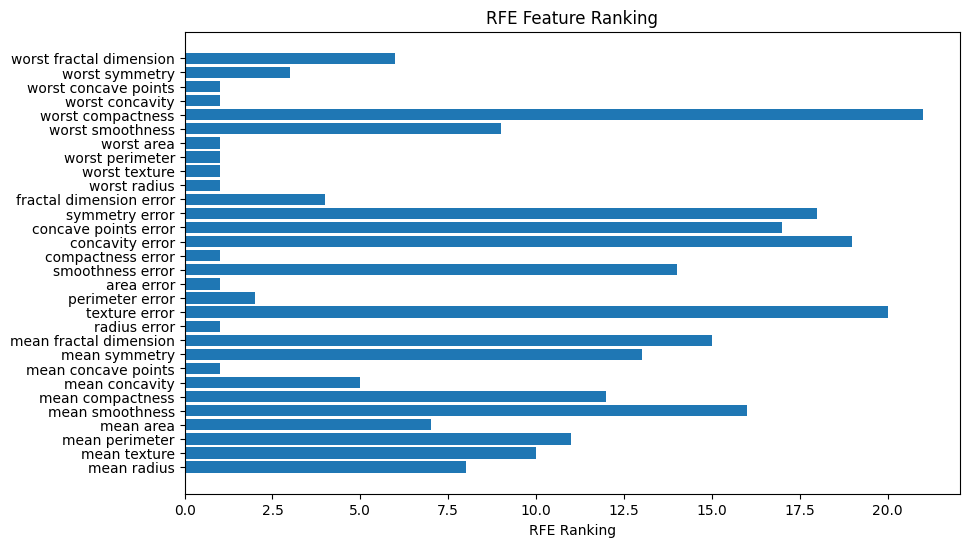

In [27]:
# ========================= Feature Selection Methods =========================

# 2. Recursive Feature Elimination (RFE)
from sklearn.linear_model import LogisticRegression
rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

# Get feature ranking from RFE
rfe_ranking = rfe.ranking_
rfe_scores_df = pd.DataFrame({'Feature': feature_names,'RFE Score': rfe_ranking})
rfe_scores_df = rfe_scores_df.sort_values(by='RFE Score', ascending=True)
top_features = rfe_scores_df.head(10)
print(top_features)

# Plot RFE Rankings
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rfe_ranking)
plt.xlabel('RFE Ranking')
plt.title('RFE Feature Ranking')
plt.show()

In [28]:
#===================== Edited part ============================================
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

                 Feature  CHI Score
7    mean concave points  41.549482
27  worst concave points  36.705723
6         mean concavity  35.144083
23            worst area  28.913309
22       worst perimeter  27.573503
20          worst radius  27.518902
3              mean area  23.688277
26       worst concavity  23.238057
2         mean perimeter  20.944919
0            mean radius  19.757335


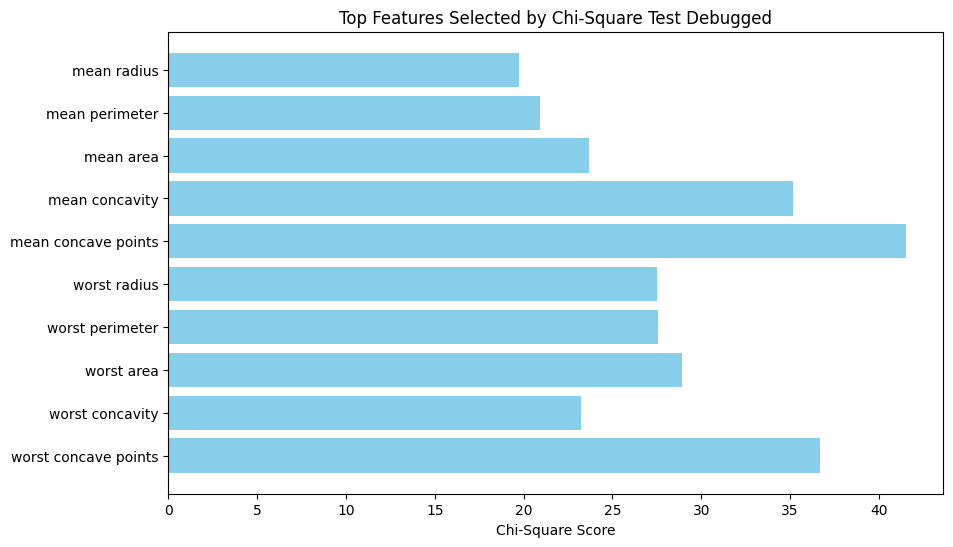

In [29]:
# Apply Chi-Square feature selection
k = 10  # Number of top features to select
chi_selector = SelectKBest(score_func=chi2, k=k)  # Initialize SelectKBest with Chi-Square test
X_train_chi2 = chi_selector.fit_transform(X_train_scaled, y_train)  # Fit and transform the training data
X_test_chi2 = chi_selector.transform(X_test_scaled)  # Apply the same transformation to the test data

# Extract feature names and scores
selected_features = X.columns[chi_selector.get_support()]  # Get names of selected features
chi_scores = chi_selector.scores_  # Chi-Squared scores for all features

# Get feature ranking from CHI
chi_scores_df = pd.DataFrame({'Feature': feature_names,'CHI Score': chi_scores})
chi_scores_df = chi_scores_df.sort_values(by='CHI Score', ascending=False)
chi_top_features = chi_scores_df.head(10)
print(chi_top_features)

# Create a DataFrame for better visualization
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Square Score': chi_scores
}).sort_values(by='Chi-Square Score', ascending=False)


# Step 4: Visualize the top features
plt.figure(figsize=(10, 6))
plt.barh(selected_features, chi_scores[chi_selector.get_support()], color="skyblue")
plt.xlabel('Chi-Square Score')
plt.title('Top Features Selected by Chi-Square Test Debugged')
plt.gca().invert_yaxis()  # Invert y-axis to show highest score at the top
plt.show()


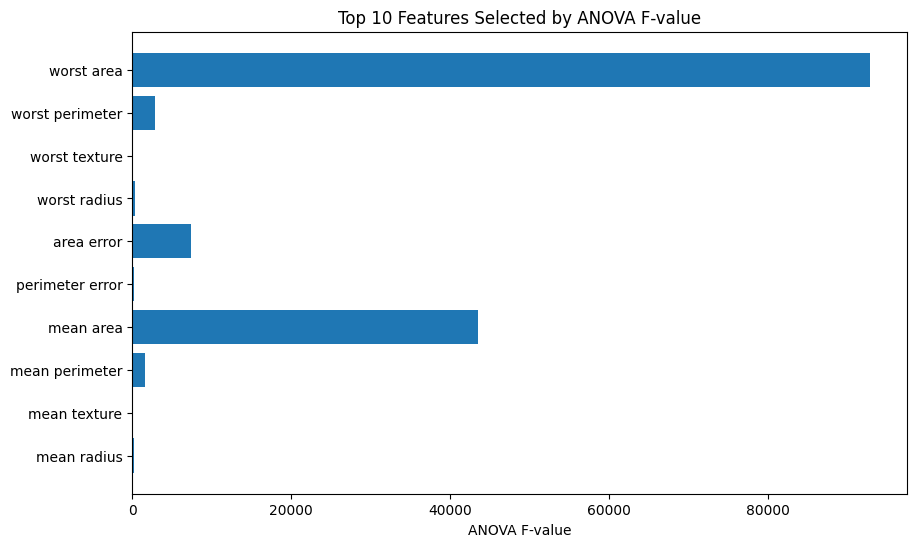

In [30]:
# ========================= Feature Selection Methods =========================

# 3. SelectKBest
chi_selector = SelectKBest(chi2, k=10)
X_train_f = chi_selector.fit_transform(X_train, y_train)
X_test_f = chi_selector.transform(X_test)

# Get selected feature indices
selected_features_f = X.columns[chi_selector.get_support()]

# Visualizing selected features
plt.figure(figsize=(10, 6))
plt.barh(selected_features_f, chi_selector.scores_[chi_selector.get_support()])
plt.xlabel('ANOVA F-value')
plt.title('Top 10 Features Selected by ANOVA F-value')
plt.show()

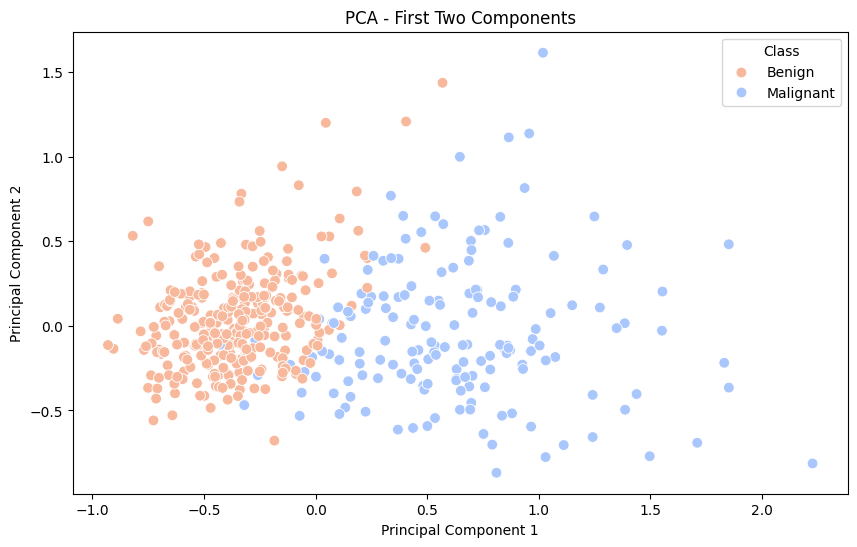

In [31]:
# ========================= Dimensionality Reduction Methods =========================

# 4. PCA (reduce to 10 principal components)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# PCA Visualization: Plot first two components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="coolwarm", s=60)
plt.title("PCA - First Two Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Class", labels=["Benign", "Malignant"])
plt.show()




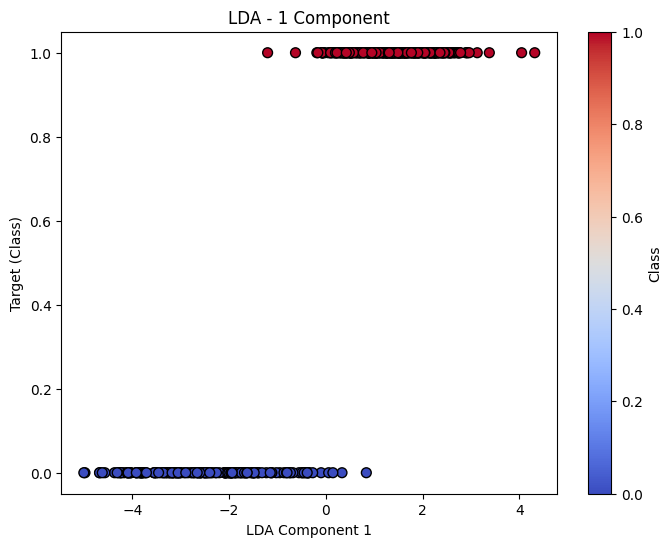

In [32]:
# ========================= Dimensionality Reduction Methods =========================

# 5. LDA (reduce to 1 component, since LDA max components = min(classes-1, features))
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)


# LDA Visualization: Plot the LDA result
plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda, y_train, c=y_train, cmap='coolwarm', edgecolor='k', s=50)
plt.title('LDA - 1 Component')
plt.xlabel('LDA Component 1')
plt.ylabel('Target (Class)')
plt.colorbar(label='Class')
plt.show()




In [33]:
# ========================= KNN Performance Evaluation =========================

# Evaluate performance on different feature selection methods
acc_mi, cm_mi = evaluate_knn(X_train_mi, X_test_mi, y_train, y_test)
acc_rfe, cm_rfe = evaluate_knn(X_train_rfe, X_test_rfe, y_train, y_test)
acc_f, cm_f = evaluate_knn(X_train_f, X_test_f, y_train, y_test)

# Evaluate performance on PCA
acc_pca, cm_pca = evaluate_knn(X_train_pca, X_test_pca, y_train, y_test)

# Evaluate performance on LDA
acc_lda, cm_lda = evaluate_knn(X_train_lda, X_test_lda, y_train, y_test)



In [34]:
# ========================= Results Display =========================

# Print Accuracy Scores
print(f"KNN Classifier Performance (Accuracy Scores): {accuracy:.4f}")
print(f"MI    : {acc_mi:.4f}")
print(f"RFE   : {acc_rfe:.4f}")
print(f"F Test: {acc_f:.4f}")
print(f"PCA   : {acc_pca:.4f}")
print(f"LDA   : {acc_lda:.4f}")


KNN Classifier Performance (Accuracy Scores): 0.9561
MI    : 0.9474
RFE   : 0.9561
F Test: 0.9386
PCA   : 0.9649
LDA   : 0.9649


In [35]:
# Display Confusion Matrices
conf_matrices = {'Mutual Information': cm_mi, 'RFE': cm_rfe, 'Chi-square': cm_f, 'PCA': cm_pca, 'LDA': cm_lda}

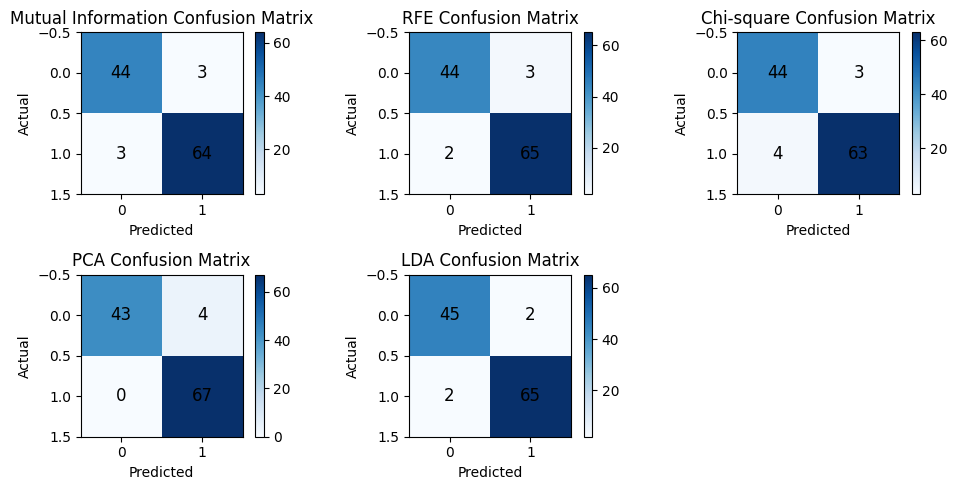

In [36]:
plt.figure(figsize=(10, 5))
for i, (key, cm) in enumerate(conf_matrices.items(), 1):
    plt.subplot(2, 3, i)
    plt.imshow(cm, cmap="Blues", interpolation="nearest")
    plt.title(f"{key} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.colorbar()

    # Add numbers inside the confusion matrix
    for (j, k), val in np.ndenumerate(cm):
        plt.text(k, j, str(val), ha='center', va='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()

In [37]:
#=================================  QUESTION 12 !!!  ==========================

pca = PCA(n_components=10)  # Reduce to 10 principal components
X_train_HYB = pca.fit_transform(X_train_rfe)
X_test_HYB = pca.transform(X_test_rfe)

acc_HYB, cm_HYB = evaluate_knn(X_train_HYB, X_test_HYB, y_train, y_test)

print("Accuracy of KNN with RFE + PCA:" , acc_HYB)

Accuracy of KNN with RFE + PCA: 0.956140350877193
